In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pingouin as pg
import seaborn as sns
import altair as alt

In [58]:
long_term = pd.read_csv("./data/long_term.csv")

In [59]:
# descriptive statistics
print('Long-term mean (1.0x speed):', long_term[long_term.Speed == '1.0 speed (normal)']['SC0'].mean())
print('Long-term mean (1.5x speed):', long_term[long_term.Speed == '1.5x speed']['SC0'].mean())
print('Long-term mean (2.0x speed):', long_term[long_term.Speed == '2.0x speed']['SC0'].mean())

print('Standard deviation (1.0x speed):', long_term[long_term.Speed == '1.0 speed (normal)']['SC0'].std())
print('Standard deviation (1.5x speed):', long_term[long_term.Speed == '1.5x speed']['SC0'].std())
print('Standard deviation (2.0x speed):', long_term[long_term.Speed == '2.0x speed']['SC0'].std())



bar = alt.Chart(long_term).mark_bar().encode(
  x='Speed',
  y='mean(SC0)'
)

error_bars = alt.Chart(long_term).mark_errorbar().encode(
  x='Speed',
  y='mean(SC0)'
)

bar + error_bars

# Short-term mean (1.0x speed): 9.181818181818182
# Short-term mean (1.5x speed): 6.636363636363637
# Short-term mean (2.0x speed): 7.454545454545454
# Standard deviation (1.0x speed): 3.2807981290588977
# Standard deviation (1.5x speed): 2.73030134866931
# Standard deviation (2.0x speed): 2.5045413298101655

Long-term mean (1.0x speed): 10.0
Long-term mean (1.5x speed): 8.125
Long-term mean (2.0x speed): 8.5
Standard deviation (1.0x speed): 3.22490309931942
Standard deviation (1.5x speed): 3.3567628964311944
Standard deviation (2.0x speed): 2.588435821108957


alt.LayerChart(...)

In [60]:
# assumption check - variances
pg.homoscedasticity(data=long_term, dv="SC0", group="Speed", method="levene", alpha=0.05)

# p > 0.05 so we can continue

,W,pval,equal_var
levene,0.278604,0.840097,True


In [61]:
# assumption check - normality
pg.normality(data=long_term, dv="SC0", group="Speed")

# p > 0.05 for all playback speeds so we can continue

c:\Python39\lib\site-packages\pingouin\distribution.py:242: UserWarning: Group I do not remember has less than 4 valid samples. Returning NaN.
  warnings.warn(f"Group {idx} has less than 4 valid samples. Returning NaN.")


,W,pval,normal
Speed,,,
1.0 speed (normal),0.846750,0.148126,True
1.5x speed,0.965788,0.863063,True
2.0x speed,0.944042,0.691909,True
I do not remember,NaN,NaN,False


In [62]:
# p < 0.05, so results are significants
pg.anova(data=long_term, dv="SC0", between="Speed", detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,Speed,109.715909,3,36.571970,3.898123,0.026207,0.393824
1,Within,168.875000,18,9.381944,NaN,NaN,NaN


In [63]:
pg.pairwise_tests(data=long_term, dv="SC0", between="Speed", subject="ResponseId", padjust="bonf")

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Speed,1.0 speed (normal),1.5x speed,False,True,1.057818,11.162607,two-sided,0.312493,1.000000,bonf,0.643,0.531518
1,Speed,1.0 speed (normal),2.0x speed,False,True,0.888523,10.000000,two-sided,0.395129,1.000000,bonf,0.599,0.473528
2,Speed,1.0 speed (normal),I do not remember,False,True,4.258882,2.801670,two-sided,0.027189,0.163134,bonf,7.211,2.408643
3,Speed,1.5x speed,2.0x speed,False,True,-0.235987,11.967853,two-sided,0.817433,1.000000,bonf,0.457,-0.114721
4,Speed,1.5x speed,I do not remember,False,True,3.463661,2.503691,two-sided,0.053422,0.320535,bonf,5.196,1.853571
5,Speed,2.0x speed,I do not remember,False,True,3.815030,2.133788,two-sided,0.056245,0.337469,bonf,5.208,2.418711


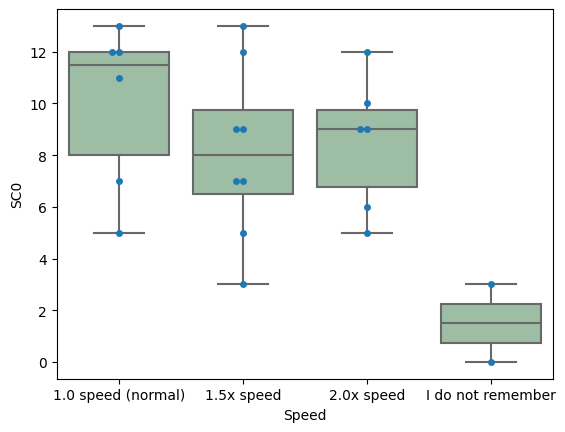

In [64]:
ax = sns.boxplot(x="Speed", y="SC0", data=long_term, color="#99c2a2")
ax = sns.swarmplot(x="Speed", y="SC0", data=long_term)
plt.show()